<a href="https://colab.research.google.com/github/hannahfonseca/FinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Show only movies with Average_rating ≥ (e.g. 4.0; Enter to skip): 3.7
Show only movies with Total_ratings ≥ (e.g. 1000; Enter to skip): 30000


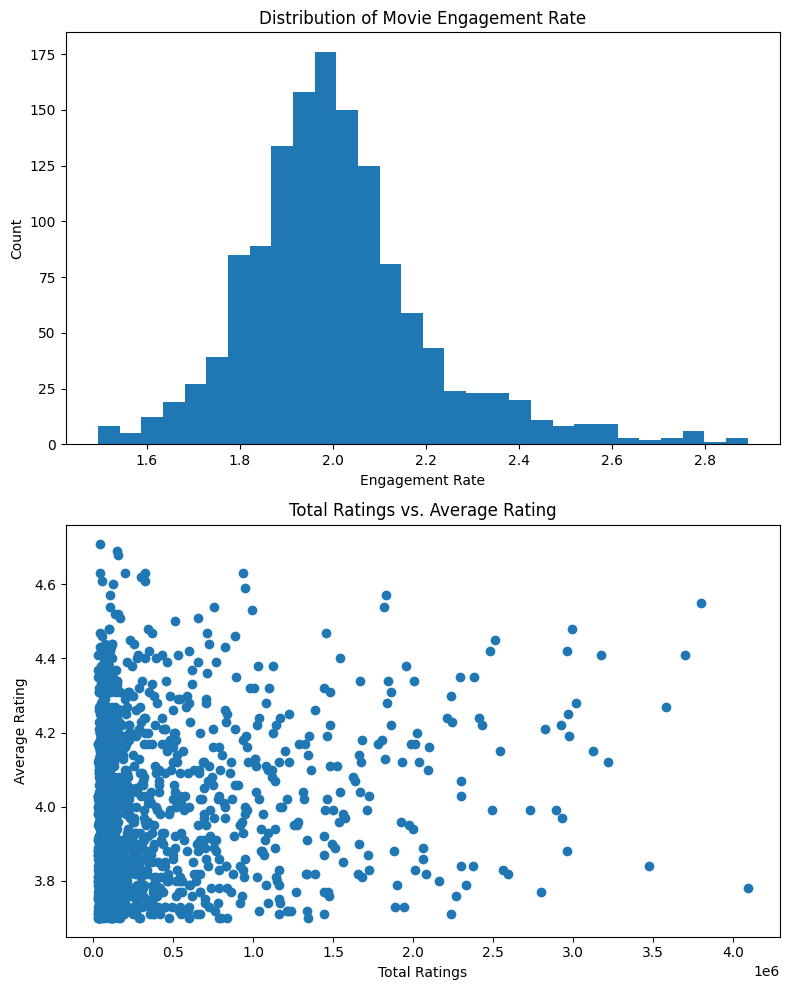

Accuracy: 84.36578171091446 %
This means that my model accurately predicts whether a movie's average score is above/below the median 84.36578171091446 % of the time given information on its runtime, engagement, etc


<Figure size 640x480 with 0 Axes>

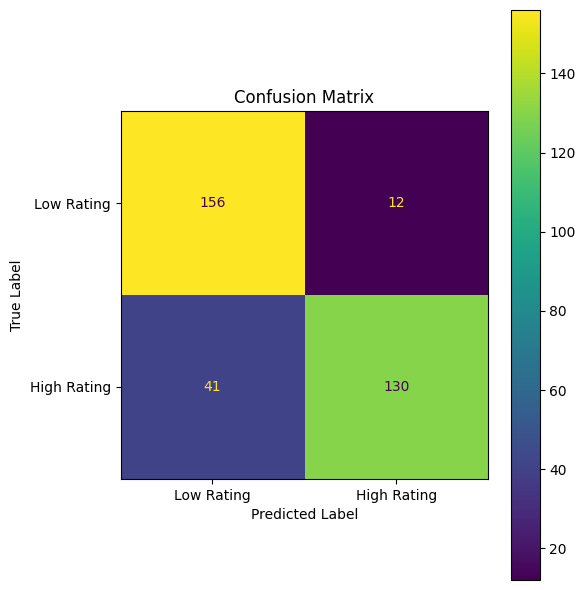


classification report:
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       168
           1       0.92      0.76      0.83       171

    accuracy                           0.84       339
   macro avg       0.85      0.84      0.84       339
weighted avg       0.85      0.84      0.84       339



<Figure size 640x480 with 0 Axes>

In [ ]:
# Hannah Fonseca
# ITP-216
# Final Project
# Using a letterboxd data set from Kaggle, asks user for specific input on the data and then creates visualizations based on letterboxd engagement and other metrics

def main():
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.model_selection import train_test_split
  from sklearn.preprocessing import StandardScaler
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.preprocessing import StandardScaler
  from sklearn.metrics import confusion_matrix, roc_curve, auc
  from sklearn.metrics import classification_report, ConfusionMatrixDisplay

  # Loading data in
  df = pd.read_csv('/content/Movie_Data_File.csv')

  # Data Wrangling
  # At this point I went through the data to find which columns I thought were irrelevant/not needed for this project
  columns_to_drop = ['Release_year', 'Director', 'Cast', 'Owner_rating', 'Countries', 'Original_language', 'Spoken_languages', 'Description', 'Studios', 'Film_URL']
  df = df.drop(columns = columns_to_drop)

  # USER INPUT REQUIREMENT
  # 'allow the user to choose what subsets of the data they would like to see'

  # Asks user if they want to only see data about movies above a certain raiting
  min_avg = input("Show only movies with Average_rating ≥ (e.g. 4.0; Enter to skip): ").strip()
  # Check it’s non‑empty, has at most one dot, and all other chars are digits
  if min_avg and min_avg.count('.') <= 1 and min_avg.replace('.', '', 1).isdigit():
      min_avg_val = float(min_avg)
      df = df[df['Average_rating'] >= min_avg_val]

  # Asks user if they want to only see data about movies above a specific number of ratings
  min_num_ratings = input("Show only movies with Total_ratings ≥ (e.g. 1000; Enter to skip): ").strip()
  # check it’s non‑empty and all digits
  if min_num_ratings and min_num_ratings.isdigit():
      min_num_ratings_val = int(min_num_ratings)
      df = df[df['Total_ratings'] >= min_num_ratings_val]

  if df.empty: # In the off chance user inputs some nonexistent criteria
      print("No movies match those criteria. Exiting.")
  else:
    # SCIENTIFIC COMPUTATION REQUIREMENT
    # In order to compute "something meaningful" I'll create an 'engagement rate' which is the (sum of Likes, Fans, Watches) ÷ Total_ratings
    df = df.dropna(subset=['Average_rating', 'Likes', 'Watches'])
    df['engagement_rate'] = (df['Likes'] + df['Fans'] + df['Watches']) / df['Total_ratings']

    fig, ax = plt.subplots(2, 1, figsize=(8, 10))

    ax[0].hist(df['engagement_rate'], bins=30)
    ax[0].set(xlabel='Engagement Rate', ylabel='Count', title='Distribution of Movie Engagement Rate')


    ''' What this figure shows:
    - Most movies fall within the 1.5 - 2.2 range of engagement, but there's a tail that extends past 3.0 which would be the super duper popular movies/cult classics
    - Shows that the average Letterboxd movie not only gets rated but users interact with it in 1-2 more actions such as a like, watchlist, etc
    '''

    # I was interested in this dataset so I decided to create another computation/figure set
    # I wanted to see if there was a correlation between total_ratings and average_rating:

    ax[1].scatter(df['Total_ratings'], df['Average_rating'])
    ax[1].set(xlabel='Total Ratings', ylabel='Average Rating', title='Total Ratings vs. Average Rating')


    '''What this figure shows:
    - There is a pretty wide spread at low counts of ratings meaning some of these movies are super highly favored while others aren't simply because a small # of users skew the mean
    - As we move to the right towards a > number of ratings, the average rating increases and narrows because one user holds less weight
    '''

    plt.tight_layout()
    plt.show()
    plt.savefig('ScientificComputations.png')

    # MACHINE LEARNING REQUIREMENT using KNN similar to L13
    median_rating = df['Average_rating'].median() # Median of all movies' average ratings
    df['high_rating'] = (df['Average_rating'] >= median_rating).astype(int) # Turns average_rating into a high vs low label that works for KNN to classify

    features = ['Runtime','Watches','List_appearances','Likes','Fans', 'Total_ratings','½','★','★½','★★','★★½','★★★','★★★½','★★★★','★★★★½','★★★★★']
    df = df.dropna(subset=features + ['high_rating']) # Some more cleaning up

    X = df[features]  # Split data into feature vector and target
    y = df['high_rating']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100, stratify = y) # Data split into training and testing subsets

    # Transform
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create & Train Model
    model_knn = KNeighborsClassifier(n_neighbors = 4)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)

    # Test Model
    accuracy = model_knn.score(X_test, y_test)

    print(f"Accuracy: {accuracy*100} %")
    print(f"This means that my model accurately predicts whether a movie's average score is above/below the median {accuracy*100} % of the time given information on its runtime, engagement, etc")

    # Creating and visualizing the confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Low Rating', 'High Rating'])
    fix, axes = plt.subplots(figsize = (6,6))
    cm_disp.plot(ax = axes)
    axes.set(title = 'Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()
    plt.savefig('ConfusionMatrixMovies.png')

    # Also created a classification report!
    print()
    print('classification report:')
    print(classification_report(y_test, y_pred))

    # It's very accurate when you do 'all' for both user options

if __name__ == '__main__':
    main()